# Энергия ферромагнетика 2D (2023)

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1.0, 5.0)$ с шагом $0.1$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.
	
Средняя энергия системы 
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом: 
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 5.0)$:

- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [79]:
import numpy as np
from numba import njit, prange
import matplotlib.pyplot as plt

In [85]:
@njit
def calculate_energy(sigma_array: np.ndarray) -> int:
    """
    Calculates energy of the system in the absence of an external magnetic field, for a 2d array.
    :param sigma_array: 2d array of spins, consisting from 1s and -1s
    :return: Energy of the system.
    """
    energy = 0
    for i in range(-1, len(sigma_array) - 1):
        for j in range(-1, len(sigma_array[0]) - 1):
            energy -= sigma_array[i][j] * sigma_array[i + 1][j] + sigma_array[i][j] * sigma_array[i][j + 1]
    return energy

In [86]:
@njit
def int_to_sigma_array(number: int, L: int) -> np.ndarray:
    """
    Converts number in base10 - unique state of the system - into a base2-ish array of 1s and -1s
    :param number: int - coded state of the system, reprensets sigma array
    :param L: length of the sigma array
    :return: sigma_array
    """
    sigma_array = np.empty(L, dtype=np.int8)
    for i in range(L):
        sigma_array[i] = (number & 1) * 2 - 1   # bitwise "and" that converts base10 int into base2, but with a shift to convert the int into 1s and -1s instead of 0s and 1s
        number = number >> 1
    return sigma_array

In [87]:
@njit(parallel=True)
def calculate_mean_energy(Lx: int, Ly: int, kt_list: np.array) -> np.array:
    """
    Computes the mean energy at fixed length and different temperatures.
    :param Lx, Ly: Length and Width of the sigma matrix
    :param kt_list: Array of temperatures
    :return: Array of normalized average energy values.
    """
    mean_statistical_sum = np.zeros(kt_list.size, dtype=float)
    mean_energy = np.zeros(kt_list.size, dtype=float)

    for N in prange(2 ** (Lx * Ly)): # Cycle through each possible state of sigmas, represented by a base10 int
        sigma = int_to_sigma_array(N, Lx * Ly).reshape(Lx, Ly)
        energy = calculate_energy(sigma)
        exp = np.exp(-energy / kt_list)
        mean_energy += energy * exp
        mean_statistical_sum += exp

    mean_energy /= (mean_statistical_sum * (Lx * Ly))
    return mean_energy

In [88]:
Lx_list = np.arange(2, 9)
Ly = 4
kt_list = np.arange(1.0, 5.0, 0.1)

mean_energy_list = np.empty((Lx_list.size, kt_list.size))
for i in range(Lx_list.size):
    print(f"Calculating for Lx={Lx_list[i]}...")
    %timeit -t -r 1 -n 1 mean_energy_list[i] = calculate_mean_energy(Lx_list[i], Ly, kt_list)

with open(f'data.npy', 'wb') as data:
    np.save(data, np.transpose(mean_energy_list))

Calculating for Lx=2...
2.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Calculating for Lx=3...
33.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Calculating for Lx=4...
43.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Calculating for Lx=5...
98.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Calculating for Lx=6...
916 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Calculating for Lx=7...
14.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Calculating for Lx=8...
4min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [84]:

test_array_L4 = np.array([-1.99715844, -1.99396091, -1.98856632, -1.98016965, -1.96786355, -1.95064256, -1.9274244,  -1.89711215, -1.85871667, -1.81153907, -1.75538029, -1.69071311,
 -1.61874282, -1.54131149, -1.46065977, -1.37911648, -1.29880759, -1.22145424,
 -1.14828469, -1.0800446,  -1.01706963, -0.95938399, -0.90679838, -0.85899291,
 -0.8155803,  -0.77615005, -0.74029707, -0.70763857, -0.67782287, -0.65053286,
 -0.62548613, -0.60243323, -0.58115501, -0.56145948, -0.5431787,  -0.52616582,
 -0.5102923,  -0.49544555, -0.48152673, -0.46844889])

test_array_L5 = np.array([-1.99715893, -1.99396296, -1.98857263, -1.98018387, -1.96788363, -1.95063964, -1.92729692, -1.89661121, -1.85735639, -1.80853133, -1.74965024, -1.68103752,
 -1.60399878, -1.52075577, -1.43412763, -1.3470633,  -1.26219309, -1.18153361,
 -1.10638872, -1.03740747, -0.97472647, -0.918132,   -0.86720255, -0.82141645,
 -0.78022445, -0.74309384, -0.70953215, -0.67909749, -0.65140075, -0.62610332,
 -0.60291264, -0.58157686, -0.56187952, -0.54363452, -0.52668165, -0.51088271,
 -0.49611811, -0.48228409, -0.46929029, -0.45705774])

with open(f'data.npy', 'rb') as data:
    mean_energy = np.transpose(np.load(data))
    print("Lx == 4:")
    print(mean_energy[2])
    print(f"Check if calculated results matches with the provided test case: {np.allclose(mean_energy[2], test_array_L4)}")
    print("\nLx == 5:")
    print(mean_energy[3])
    print(f"Check if calculated results matches with the provided test case: {np.allclose(mean_energy[3], test_array_L5)}")


Lx == 4:
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
Check if calculated results matches with the provided test case: False

Lx == 5:
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
Check if calculated results matches with the provided test case: False


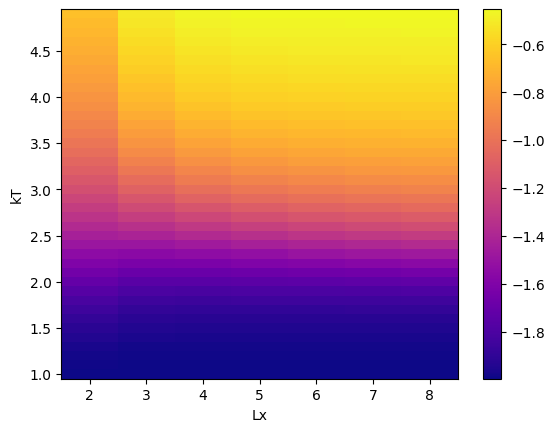

In [73]:
with open(f'data.npy', 'rb') as data:
    mean_energy = np.load(data)
    plt.pcolormesh(Lx_list, kt_list, mean_energy, cmap="plasma")
    plt.xticks(Lx_list, fontsize=10)
    plt.yticks(kt_list[::5], fontsize=10)
    plt.xlabel('Lx')
    plt.ylabel('kT')
    plt.colorbar()
    plt.show()